In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

import pandas as pd
import io
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignanat 212


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


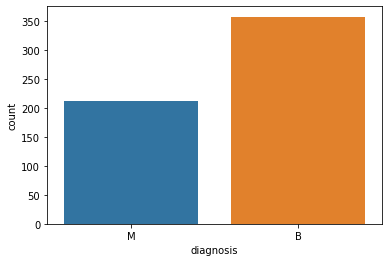

In [4]:
import seaborn as sns
ax = sns.countplot(data['diagnosis'], label= 'Count')
B,M = data['diagnosis'].value_counts()
print('Benign', B)
print('Malignanat', M)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing data
del data['Unnamed: 32']

In [0]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [8]:
X_test

array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [9]:
!pip install keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [0]:
from keras.layers import Dropout
#adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu',input_dim=30))
classifier.add(Dropout(0.6))

#adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(0.6))

#adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


In [0]:
classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
455/455 [==============================] - 0s 900us/step - loss: 0.6927 - accuracy: 0.6242
Epoch 2/150
455/455 [==============================] - 0s 48us/step - loss: 0.6913 - accuracy: 0.6637
Epoch 3/150
455/455 [==============================] - 0s 37us/step - loss: 0.6896 - accuracy: 0.6593
Epoch 4/150
455/455 [==============================] - 0s 36us/step - loss: 0.6872 - accuracy: 0.6593
Epoch 5/150
455/455 [==============================] - 0s 43us/step - loss: 0.6825 - accuracy: 0.7033
Epoch 6/150
455/455 [==============================] - 0s 41us/step - loss: 0.6764 - accuracy: 0.7363
Epoch 7/150
455/455 [==============================] - 0s 37us/step - loss: 0.6681 - accuracy: 0.7626
Epoch 8/150
455/455 [==============================] - 0s 37us/step - loss: 0.6545 - accuracy: 0.7912
Epoch 9/150
455/455 [==============================] - 0s 36us/step - loss: 0.6370 - accuracy: 0.8418
Epoch 10/150
455/455 [==============================] - 0s 45us/step - loss: 0.61

In [14]:
X_test


array([[-0.20175604,  0.3290786 , -0.13086754, ...,  1.3893291 ,
         1.08203284,  1.54029664],
       [-0.25555773,  1.46763319, -0.31780437, ..., -0.83369364,
        -0.73131577, -0.87732522],
       [-0.02619262, -0.8407682 , -0.09175081, ..., -0.49483785,
        -1.22080864, -0.92115937],
       ...,
       [ 1.71811488,  0.09318356,  1.7286186 , ...,  1.57630515,
         0.20317063, -0.15406178],
       [ 1.18859296,  0.34352115,  1.19333694, ...,  0.56019755,
         0.26991966, -0.27320074],
       [ 0.26263752, -0.58080224,  0.28459338, ..., -0.19383705,
        -1.15564888,  0.11231497]])

In [0]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

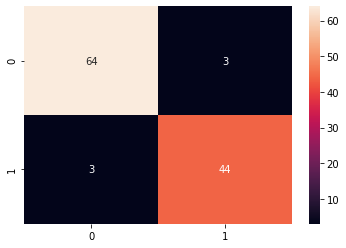

In [17]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')


In [18]:
#First Accuracy after training
(65+44)/114

0.956140350877193

In [19]:
(64+44)/114

0.9473684210526315

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
def built_classifier():
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer="Adam", loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs=100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y=y_train, cv=10, n_jobs =-1)



In [21]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 0.97777778, 0.95555556])

In [22]:
accuracies.mean()

0.9801449298858642

In [23]:
accuracies.std()

0.01832752235693276

In [24]:
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def built_classifier(optimizer = 'adam'):
  classifier = Sequential()
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
  classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
  classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))
  classifier.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
  return classifier

classifier = KerasClassifier(build_fn = built_classifier)
parameters = {'batch_size': [10, 32],'epochs': [100, 200],'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy',
                           cv = 3)

grid_search = grid_search.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


Streaming output truncated to the last 5000 lines.
303/303 [==============================] - 0s 504us/step - loss: 0.6680 - accuracy: 0.8812
Epoch 2/200
303/303 [==============================] - 0s 242us/step - loss: 0.5354 - accuracy: 0.9637
Epoch 3/200
303/303 [==============================] - 0s 280us/step - loss: 0.3593 - accuracy: 0.9703
Epoch 4/200
303/303 [==============================] - 0s 266us/step - loss: 0.2216 - accuracy: 0.9736
Epoch 5/200
303/303 [==============================] - 0s 246us/step - loss: 0.1464 - accuracy: 0.9703
Epoch 6/200
303/303 [==============================] - 0s 244us/step - loss: 0.1105 - accuracy: 0.9835
Epoch 7/200
303/303 [==============================] - 0s 286us/step - loss: 0.0933 - accuracy: 0.9835
Epoch 8/200
303/303 [==============================] - 0s 262us/step - loss: 0.0841 - accuracy: 0.9835
Epoch 9/200
303/303 [==============================] - 0s 277us/step - loss: 0.0801 - accuracy: 0.9835
Epoch 10/200
303/303 [============

In [26]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_accuracy


0.9692691994887882